In [5]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-05 16:01:54--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.007s  

2025-10-05 16:01:54 (123 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [6]:
import numpy as np
import pandas as pd

df = pd.read_csv("car_fuel_efficiency.csv")
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

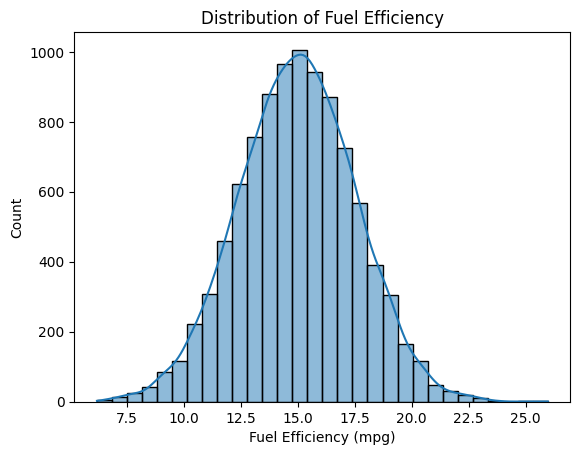

,fuel_efficiency_mpg
count,9704.000000
mean,14.985243
std,2.556468
min,6.200971
25%,13.267459
50%,15.006037
75%,16.707965
max,25.967222


In [3]:

#EDA
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['fuel_efficiency_mpg'], bins=30, kde=True)
plt.xlabel('Fuel Efficiency (mpg)')
plt.title('Distribution of Fuel Efficiency')
plt.show()

df['fuel_efficiency_mpg'].describe()

In [7]:
#Q1
df.isnull().sum()

,0
engine_displacement,0
horsepower,708
vehicle_weight,0
model_year,0
fuel_efficiency_mpg,0


In [8]:

#Q2
df['horsepower'].median()

149.0

In [9]:

#Q3
def rmse(y, y_pred):
    return np.sqrt(((y - y_pred)**2).mean())

def prepare_X(df):
    X = df[['engine_displacement','horsepower','vehicle_weight','model_year']].to_numpy()
    ones = np.ones((len(X),1))
    return np.hstack([ones, X])

def train_linear_regression(X, y, r=0.0):
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    reg[0,0] = 0
    w = np.linalg.inv(XTX + reg).dot(X.T).dot(y)
    return w

df_shuffled = df.sample(frac=1, random_state=42)
n = len(df)
n_train, n_val = int(0.6*n), int(0.2*n)
df_train = df_shuffled.iloc[:n_train]
df_val = df_shuffled.iloc[n_train:n_train+n_val]

# Option 1: fill with 0
df_train_0 = df_train.fillna(0)
df_val_0 = df_val.fillna(0)

X_train_0, y_train = prepare_X(df_train_0), df_train_0['fuel_efficiency_mpg'].to_numpy()
X_val_0, y_val = prepare_X(df_val_0), df_val_0['fuel_efficiency_mpg'].to_numpy()

w0 = train_linear_regression(X_train_0, y_train)
rmse_0 = rmse(y_val, X_val_0.dot(w0))

# Option 2: fill with mean
hp_mean = df_train['horsepower'].mean()
df_train_m = df_train.fillna({'horsepower': hp_mean})
df_val_m = df_val.fillna({'horsepower': hp_mean})

X_train_m, y_train_m = prepare_X(df_train_m), df_train_m['fuel_efficiency_mpg'].to_numpy()
X_val_m, y_val_m = prepare_X(df_val_m), df_val_m['fuel_efficiency_mpg'].to_numpy()

w_m = train_linear_regression(X_train_m, y_train_m)
rmse_m = rmse(y_val_m, X_val_m.dot(w_m))

print("RMSE fill 0:", round(rmse_0, 2))
print("RMSE fill mean:", round(rmse_m, 2))

RMSE fill 0: 0.52
RMSE fill mean: 0.46


In [11]:

#Q4
r_list = [0, 0.01, 0.1, 1, 5, 10, 100]
df_train0, df_val0 = df_train.fillna(0), df_val.fillna(0)
X_train, y_train = prepare_X(df_train0), df_train0['fuel_efficiency_mpg'].to_numpy()
X_val, y_val = prepare_X(df_val0), df_val0['fuel_efficiency_mpg'].to_numpy()

for r in r_list:
    w = train_linear_regression(X_train, y_train, r=r)
    y_pred = X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(f"r={r}", round(score, 2))

r=0 0.52
r=0.01 0.52
r=0.1 0.52
r=1 0.52
r=5 0.52
r=10 0.52
r=100 0.52


In [ ]:
#Q5
scores = []
for seed in range(10):
    df_shuf = df.sample(frac=1, random_state=seed)
    n = len(df)
    n_train, n_val = int(0.6*n), int(0.2*n)
    df_train = df_shuf.iloc[:n_train].fillna(0)
    df_val = df_shuf.iloc[n_train:n_train+n_val].fillna(0)
    X_train, y_train = prepare_X(df_train), df_train['fuel_efficiency_mpg'].to_numpy()
    X_val, y_val = prepare_X(df_val), df_val['fuel_efficiency_mpg'].to_numpy()
    w = train_linear_regression(X_train, y_train)
    scores.append(rmse(y_val, X_val.dot(w)))

print("RMSEs:", [round(s,3) for s in scores])
print("STD:", round(np.std(scores),3))

RMSEs: [np.float64(0.521), np.float64(0.522), np.float64(0.523), np.float64(0.516), np.float64(0.511), np.float64(0.529), np.float64(0.532), np.float64(0.51), np.float64(0.515), np.float64(0.513)]
STD: 0.007


In [ ]:
#Q6
seed = 9
df_shuf = df.sample(frac=1, random_state=seed)
n = len(df)
n_train, n_val = int(0.6*n), int(0.2*n)
df_train = df_shuf.iloc[:n_train]
df_val = df_shuf.iloc[n_train:n_train+n_val]
df_test = df_shuf.iloc[n_train+n_val:]

df_trainval = pd.concat([df_train, df_val])
df_trainval = df_trainval.fillna(0)
df_test = df_test.fillna(0)

X_trainval, y_trainval = prepare_X(df_trainval), df_trainval['fuel_efficiency_mpg'].to_numpy()
X_test, y_test = prepare_X(df_test), df_test['fuel_efficiency_mpg'].to_numpy()

w = train_linear_regression(X_trainval, y_trainval, r=0.001)
y_pred = X_test.dot(w)
print("Test RMSE:", round(rmse(y_test, y_pred), 3))

Test RMSE: 0.515
